In [192]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
from sklearn.naive_bayes import GaussianNB

In [193]:
def est_gaus_par(X):
    mu = np.mean(X,axis=0)
    sig = np.std(X,axis=0)
    return mu,sig

In [194]:
mean_1 = array([-3, 5]) # mu
cov_1 = matrix([
    [2, 1],
    [1, 3]
]) #sigma
x_1, y_1 = np.random.multivariate_normal(mean_1, cov_1, 30).T

In [195]:
X_1 = np.stack((np.array(x_1), np.array(y_1)), axis=-1) # [x, y]

mu_1, sigma_1 = est_gaus_par(X_1)

In [196]:
mean_2 = array([3, 5]) # mu
cov_2 = matrix([
    [2, -1],
    [-1, 3]
]) #sigma
x_2, y_2 = np.random.multivariate_normal(mean_2, cov_2, 40).T

In [197]:
X_2 = np.stack((np.array(x_2), np.array(y_2)), axis=-1)

mu_2, sigma_2 = est_gaus_par(X_2)

In [198]:
sample_1 = np.stack((np.array(x_1), np.array(y_1)), axis=-1)
sample_2 = np.stack((np.array(x_2), np.array(y_2)), axis=-1)
X = np.concatenate((sample_1, sample_2)).astype('float')
y = np.concatenate((np.zeros(30), np.ones(40))).astype('int')

In [199]:
x_test_1, y_test_1 = np.random.multivariate_normal(mean_1, cov_1, 3).T
x_test_2, y_test_2 = np.random.multivariate_normal(mean_2, cov_2, 3).T

test_1 = np.stack((np.array(x_test_1), np.array(y_test_1)), axis=-1)
test_2 = np.stack((np.array(x_test_2), np.array(y_test_2)), axis=-1)
X_test = np.concatenate((test_1, test_2)).astype('float')
y_test = np.concatenate((np.zeros(3), np.ones(3))).astype('int')

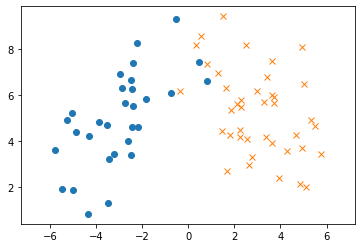

In [200]:
plt.plot(x_1, y_1, 'o') # c0
plt.plot(x_2, y_2, 'x') # c1
plt.axis('equal')
plt.show()

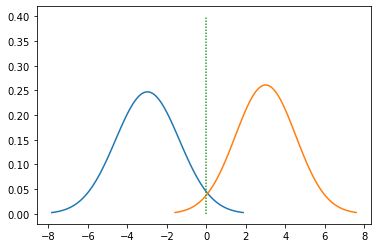

In [201]:
mu_1, sigma_1 = est_gaus_par(x_1)
mu_2, sigma_2 = est_gaus_par(x_2)

fig, ax = plt.subplots()
x1_g = np.linspace(mu_1 - 3*sigma_1, mu_1 + 3*sigma_1, 100)
x2_g = np.linspace(mu_2 - 3*sigma_2, mu_2 + 3*sigma_2, 100)
plt.plot(x1_g, stats.norm.pdf(x1_g, mu_1, sigma_1))
plt.plot(x2_g, stats.norm.pdf(x2_g, mu_2, sigma_2))
ax.plot([0, 0], [0, 0.4], linestyle='--', dashes=(1, 1))
plt.show()

In [208]:
model = GaussianNB()
model.fit(X, y)

X_sample, y_sample = [X[30]], y[30]
yhat_prob = model.predict_proba(X_sample)
print('Probabilities: ', yhat_prob)

y_pred = model.predict(X_sample)
print('Predicted: ', y_pred)
print('True: y=%d' % y_sample)
print('Prior C0=%f' % model.class_prior_[0])
print('Prior C1=%f' % model.class_prior_[1])

Probabilities:  [[0.98589444 0.01410556]]
Predicted:  [0]
True: y=0
Prior C0=0.428571
Prior C1=0.571429


In [203]:
y_pred = model.predict_proba(X_test); y_pred

array([[9.99198676e-01, 8.01324192e-04],
       [9.99259364e-01, 7.40636157e-04],
       [9.88173201e-01, 1.18267986e-02],
       [1.12235106e-03, 9.98877649e-01],
       [1.78799884e-02, 9.82120012e-01],
       [3.95697915e-03, 9.96043021e-01]])

In [204]:
y_test

array([0, 0, 0, 1, 1, 1])

In [205]:
model = GaussianNB(priors=[0.8, 0.2])
model.fit(X, y)

X_sample, y_sample = [X[50]], y[50]
yhat_prob = model.predict_proba(X_sample)
print('Probabilities: ', yhat_prob)

y_pred = model.predict(X_sample)
print('Predicted: ', y_pred)
print('True: y=%d' % y_sample)
print('Prior C0=%f' % model.class_prior_[0])
print('Prior C1=%f' % model.class_prior_[1])

Probabilities:  [[0.02232555 0.97767445]]
Predicted:  [1]
True: y=1
Prior C0=0.800000
Prior C1=0.200000


In [206]:
y_pred = model.predict_proba(X_test); y_pred

array([[9.99849654e-01, 1.50346173e-04],
       [9.99861047e-01, 1.38952897e-04],
       [9.97760960e-01, 2.23904029e-03],
       [5.95690080e-03, 9.94043099e-01],
       [8.85027497e-02, 9.11497250e-01],
       [2.07481226e-02, 9.79251877e-01]])